# 第八章D：Matplotlib基础教程
___

## 学习目标
1. 掌握Matplotlib的基本绘图知识

2. 对Matplotlib三维绘图的基本能力

3. 能对图形进行美化，输出

## 1. 背景介绍

Matplotlib是出色的2D和3D科研绘图工具。Matplotlib具有极大优点：
- 容易上手和掌握
- 支持$\LaTeX$格式的标签和文本显示
- 对图形元素的控制较好，如图片大小和DPI
- 可以输出多种高性能的图片格式，如PNG, PDF, SVG, EPS和PGF
- 可以用图形用户界面输出多张图片并进行批量的调试

首先，我们要设置在Jupyter Notebook中在线显示图片：

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.display import HTML
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

然后导入必要的模块。这有两种方式，一种是导入`pylab`模块，这种方法更加方便一些：

In [3]:
import pylab

也可以用另一种方式：

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
import numpy as np

### 用类似Matlab的语法生成图片

In [8]:
from pylab import *

In [9]:
x = np.linspace(0, 5, 10)
y = x ** 2

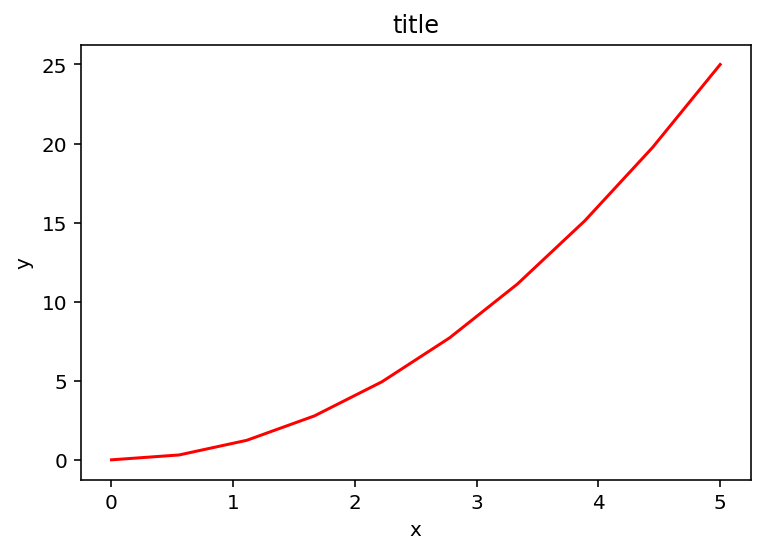

In [10]:
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

还可以绘制多张图片，并设置颜色和线型：

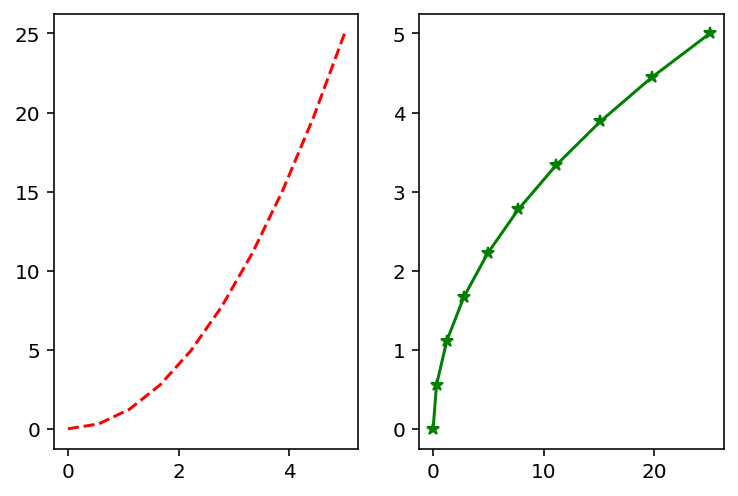

In [11]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

前面这种方式封装了来自Matlab相似的语法，对于熟悉Matlab的开发者来说比较容易上手。

### Matplotlib-API的绘图方式

这是一种面向对象的API。
- 首先创建一个Figure对象fig
- 用`add_axes()`方法在其中添加坐标系
- 在坐标系中绘图

Text(0.5, 1.0, 'title')

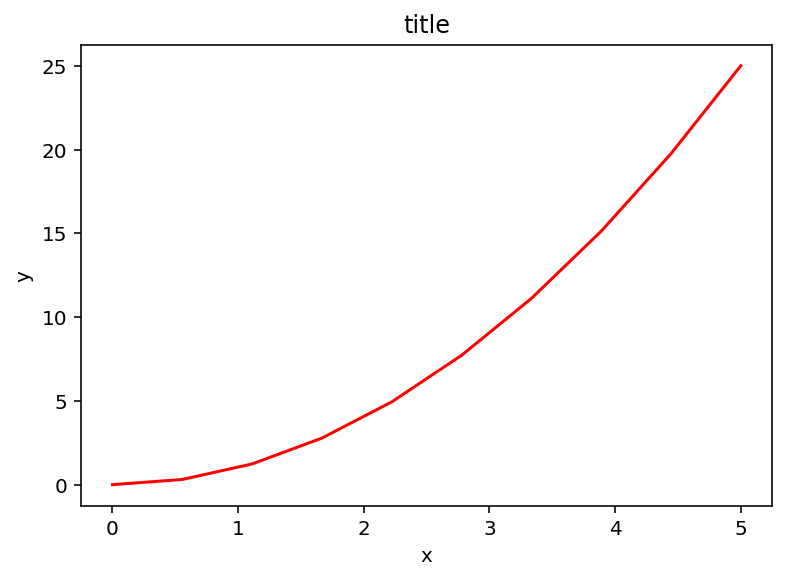

In [13]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height, 0-1 percentage
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

代码比刚才多了一些，优点是我们对这个体系有更好的控制：

Text(0.5, 1.0, 'sub-title')

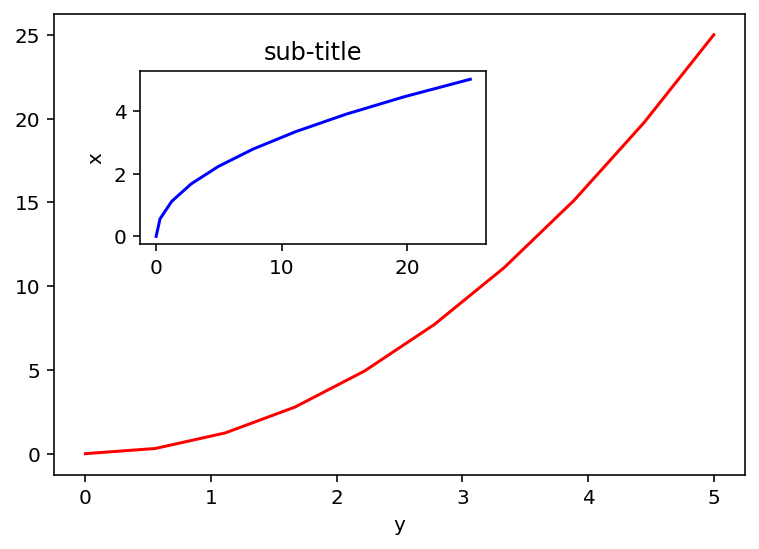

In [14]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('title')

axes2.plot(y, x, 'b')
axes1.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('sub-title')

如果我们不想人工去设置画布上图片的放置位置，我们可以让系统自动去布局，比如我们可以用subplots：

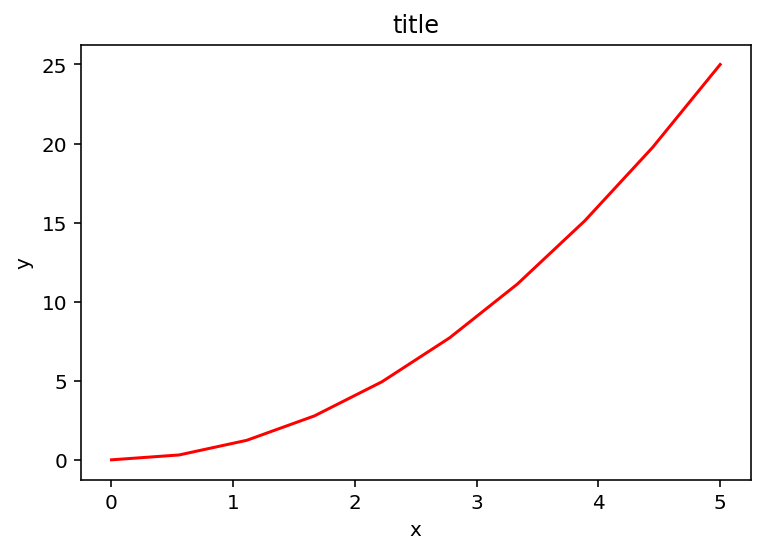

In [15]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

甚至通过设置subplots的grid模式实现多张图并排：

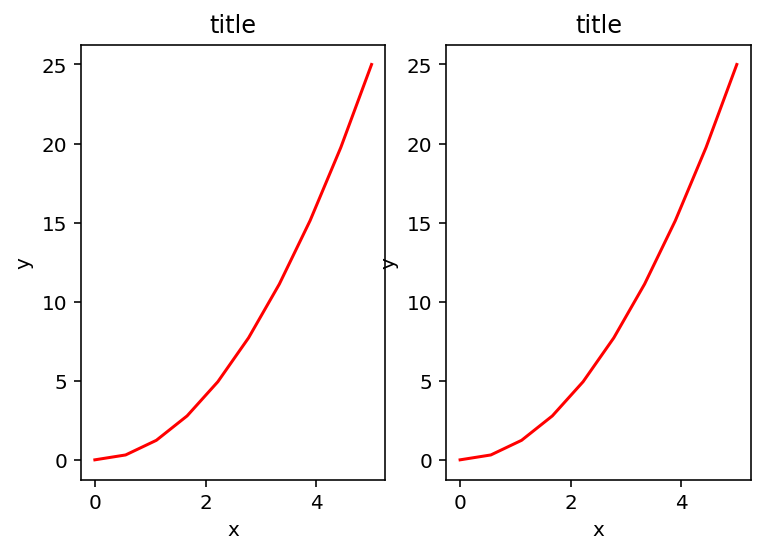

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

有点太挤了，是不是？我们可以调用`fig.tight_layout()`方法重排一下：

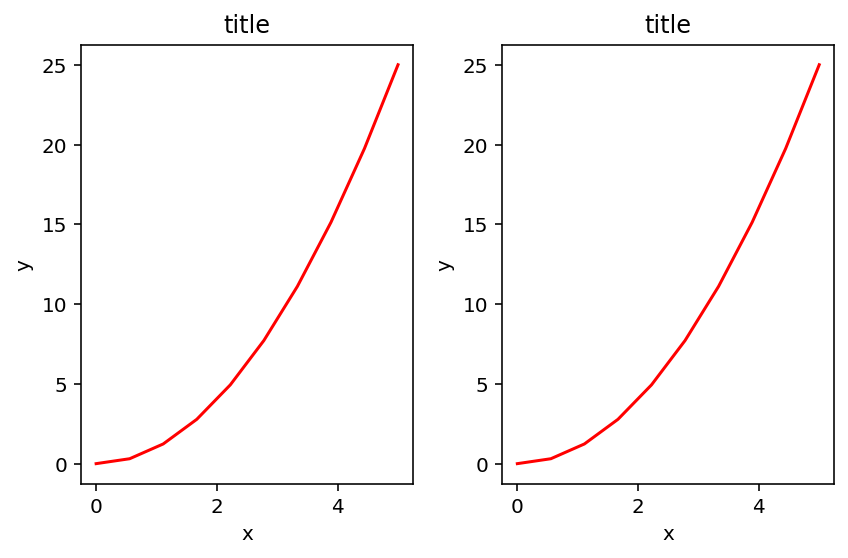

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### 设置图片大小、长宽比和DPI

在创建Figure对象的时候，我们可以输入关键词参数`figsize`和`dpi`设置图片的大小和DPI：
- `figsize`是一个tuple，分别对应长和宽，默认单位为英寸（inches）
- `dpi`是`dots-per-inches`的缩写

<Figure size 800x400 with 0 Axes>

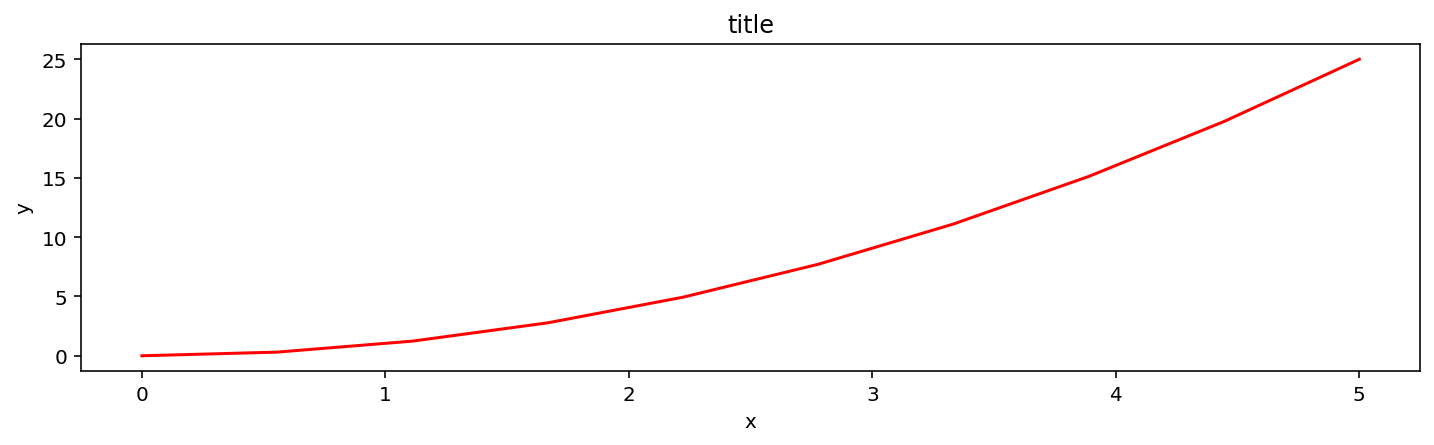

In [19]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### 保存图片

调用`Figure`类的`savefig()`方法保存图片：

In [21]:
import os

In [22]:
os.mkdir("./fig")

In [23]:
fig.savefig('fig/filename.png')

如果需要生成高质量的图片，推荐用PDF格式，这样在$\LaTeX$中可以通过`\includegraphics{}`的方式插入pdf图片，可以获得高质量的文章。

In [24]:
fig.savefig('fig/filename.pdf', dpi=120)

### 设置图标、标签和图片标题

#### 设置标题

设置标题可用坐标系实例的`set_title()`方法设置图片的标题：

In [25]:
ax.set_title("title")

Text(0.5, 1, 'title')

#### 设置标签

同样，用坐标系实例的`set_xlabel()`和`set_ylabel()`方法分别设置横坐标和纵坐标的标签：

In [26]:
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(454.6000000000001, 0.5, 'y')

#### 设置图示

添加曲线的图示有两种方法：
- 通过`ax.legend(["curve 1", "curve 2", "curve 3"])`用列表设置多个图示
- 在绘图`plot(..., label="curve 1")`的方式为每个曲线设置标签，然后再运行`ax.legend()`就可以了

<Figure size 800x400 with 0 Axes>

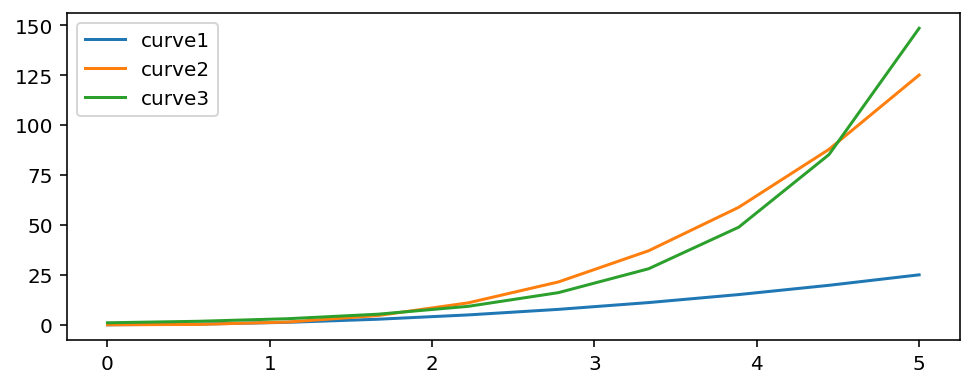

In [32]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.plot(x, np.exp(x), label="curve3")
ax.legend()

上面`legend()`方法可以使用一个参数`loc`设置图示在图中的位置：

In [33]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

将上面的内容汇总在一起，可以生成新的图形：

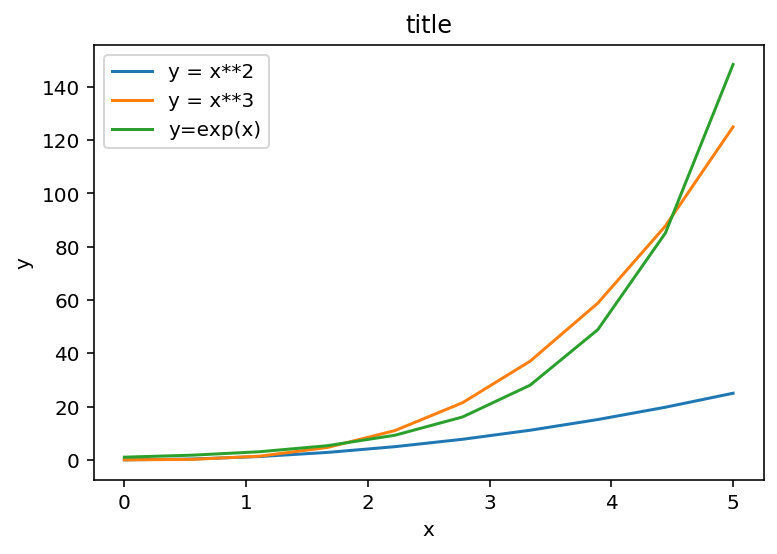

In [34]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.plot(x, np.exp(x), label="y=exp(x)")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

这种图示的显示还是不够完善，能否显示特别的公式呢？答案显然是肯定的：

### 设置图形文字的显示

#### $\LaTeX$格式文字的设置

- 我们可以在`legend`、`xlabel`、`ylabel`和`title`中显示用$\LaTeX$写就的数学公式

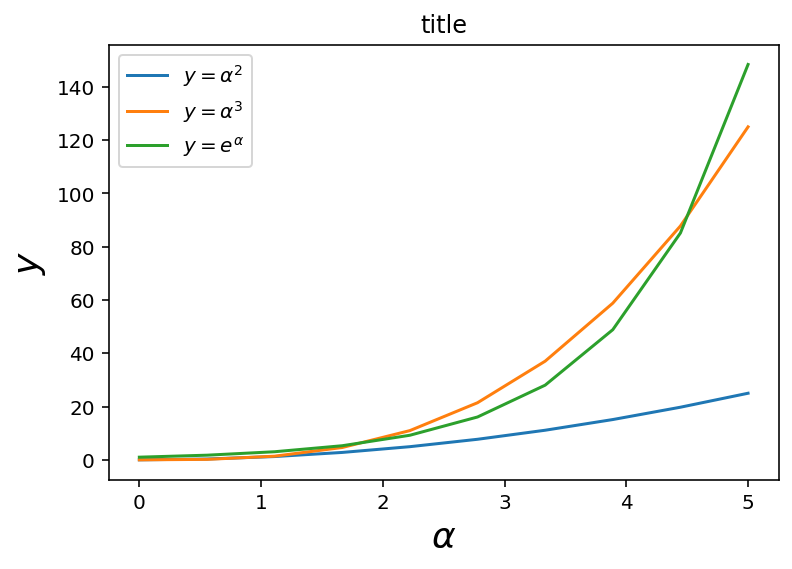

In [35]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

我们还可以修改全局的文字大小和字体：

In [36]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

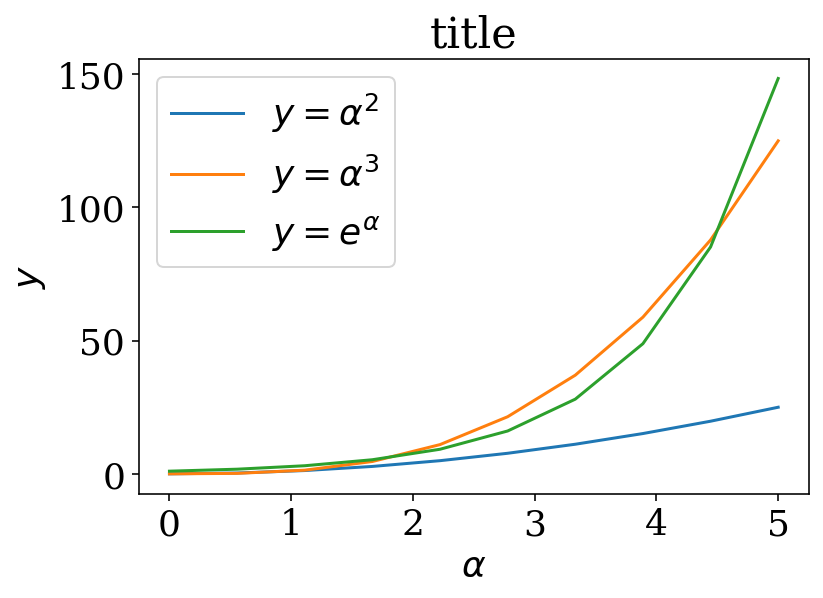

In [37]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

我们还可以选择更好的字体：

In [38]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

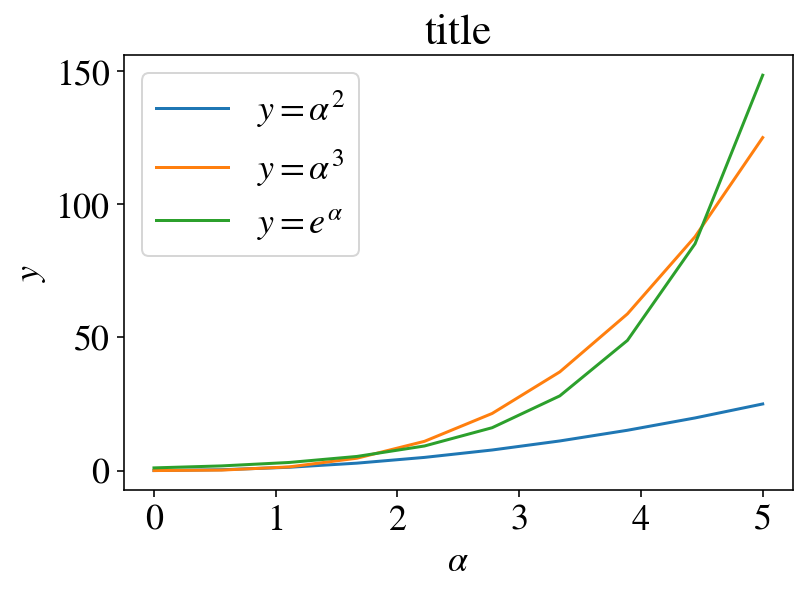

In [39]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

我们还可以设置以$\LaTeX$格式显示图形中的文字：

In [41]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

In [43]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

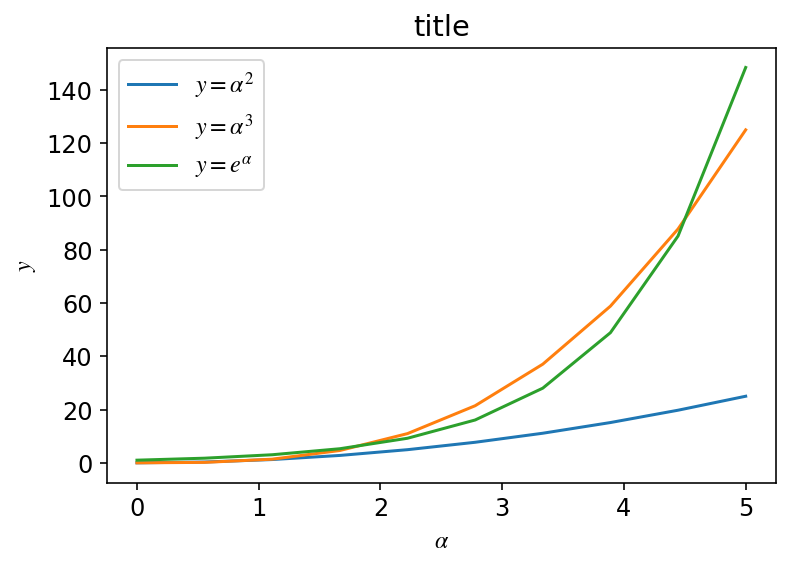

In [44]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### 设置颜色、线宽、线型等

可以采用类似Matlab的风格：

In [45]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

也可以显式设置曲线的颜色，可以用颜色的名称，也可以用RGB三原色的十六进制方式设置：

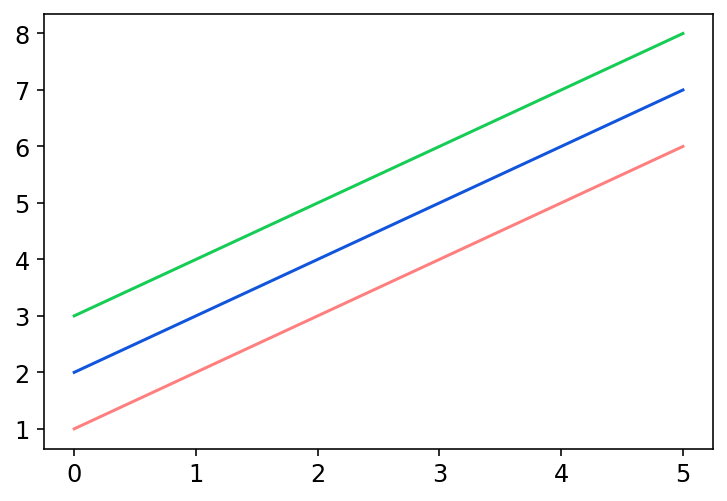

In [46]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### 曲线线宽和线型的设置
- 线宽采用`linewidth`或者`lw`关键词参数设置
- 线型采用`linestyle`或`ls`进行设置
- 点型可用`marker`参数设置

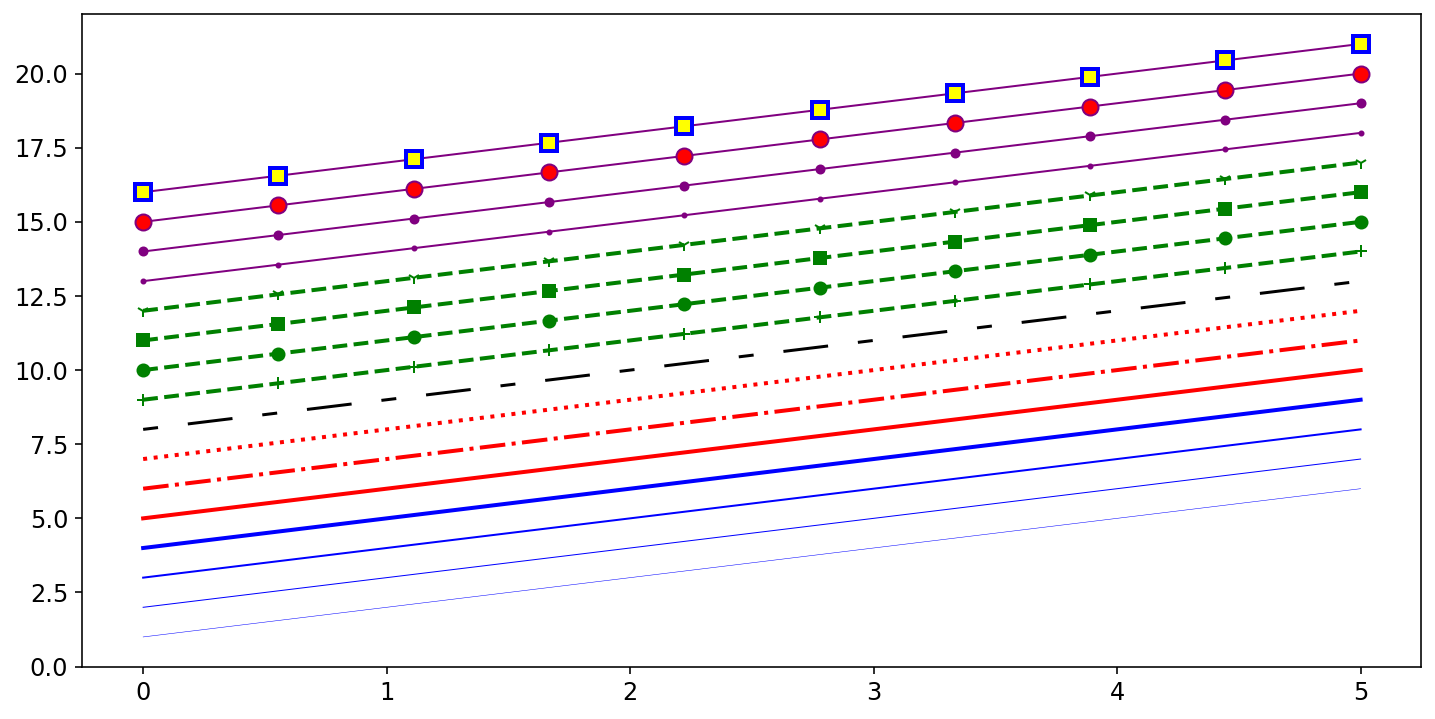

In [47]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### 坐标轴的外观设置

对于要发表的图片来说，坐标轴的外观是一个重要的因素，比如刻度和坐标标签的位置，字体大小等。

#### 设置坐标范围

设置横坐标和纵坐标的范围可以简单的通过`ax.set_xlim()`和`ax.set_ylim()`实现，也可以用`ax.axis("tight")`让系统自动设置。

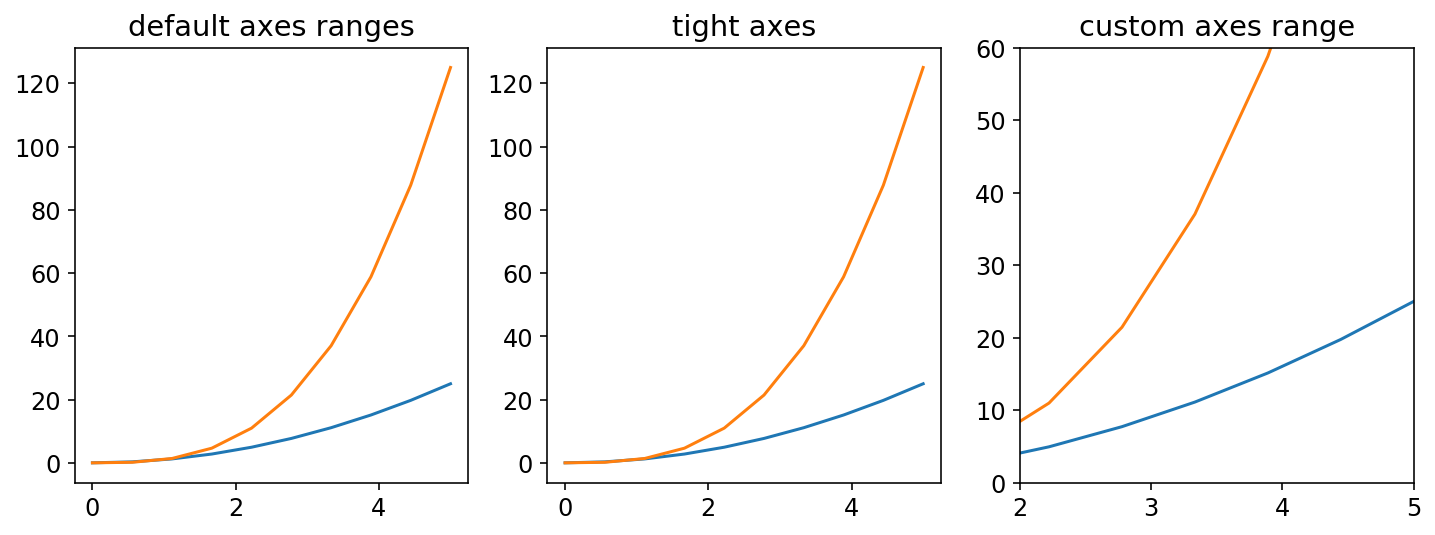

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### 为坐标设置对数标度

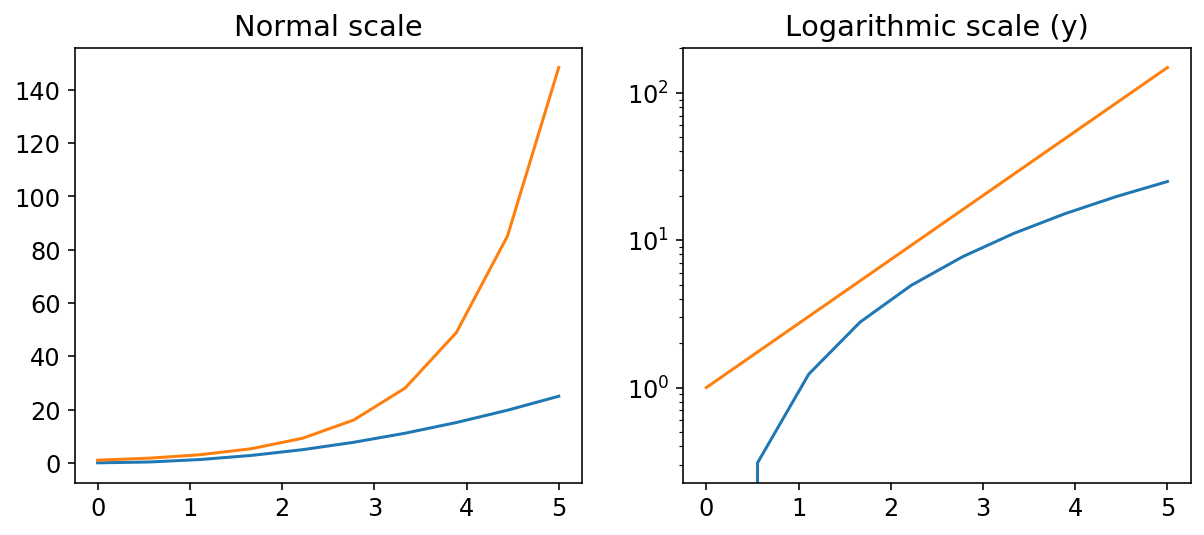

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

#### 刻度和刻度标签的设置

- 刻度可用`ax.set_xticks()`和`ax.set_yticks()`进行设置
- 刻度标签则用`ax.set_xticklabels()`和`ax.set_yticklabels()`方法进行设置。

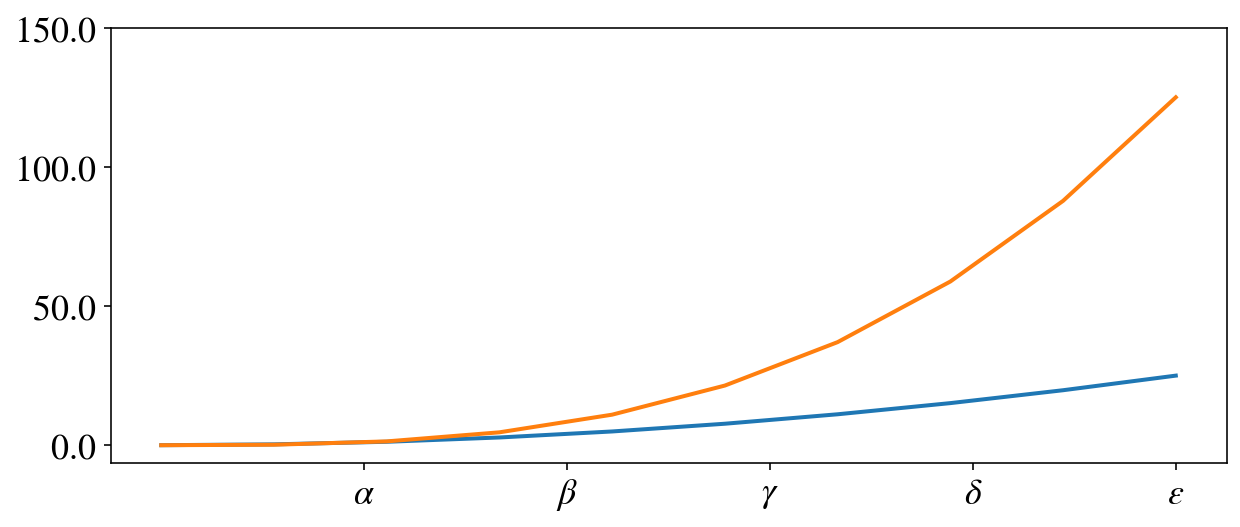

In [50]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

#### 科学计数法的使用

如果坐标值非常大，可以考虑用科学计数法表示：

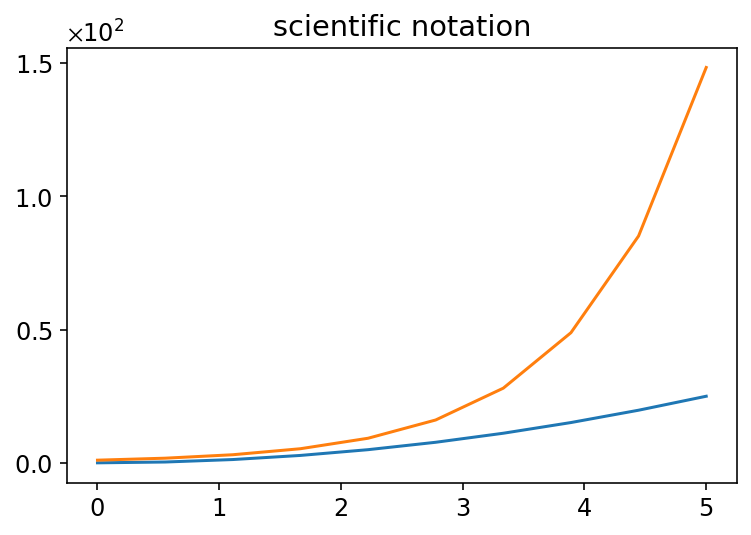

In [51]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 